In [ ]:
# importing the library
import pandas as pd
import numpy as np

In [ ]:
# importing the dataset
data = pd.read_csv('Wiki-Vote.txt', sep="\t", skiprows=3)
data.rename(columns = {'# FromNodeId':'FromNodeId'}, inplace = True)
source_node = data['FromNodeId'].tolist()
target_node = data['ToNodeId'].tolist()
total_node = source_node + target_node
storenode = np.unique(total_node)

edge_list = []
for i in range(len(source_node)):
  edge_list.append((source_node[i], target_node[i]))

In [ ]:
print(len(storenode))

7115


In [ ]:
data.head()

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [ ]:
# This is a helper function which made a list of edge and node and make a list between edge and node 
def nodeEdge(data):
  edges=[]
  fromNode=[]
  toNode=[]
  nodes=[]
  for i in range(0,len(data)):
    fromNode.append(data['FromNodeId'][i])
    toNode.append(data['ToNodeId'][i])
    edges.append((data['FromNodeId'][i],data['ToNodeId'][i]))
  nodes = pd.concat([data['FromNodeId'], data['ToNodeId']]).unique().tolist()
  return edges,nodes
  

In [ ]:
total_edge_list,total_node_list=nodeEdge(data)
print('total_node_list',total_node_list)
print('total_edge_list',total_edge_list)


total_node_list [30, 3, 25, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 54, 28, 33, 34, 36, 35, 37, 38, 39, 40, 26, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 29, 55, 56, 57, 58, 59, 60, 62, 27, 63, 64, 65, 66, 72, 73, 75, 76, 78, 79, 77, 80, 81, 83, 91, 67, 84, 85, 86, 71, 87, 88, 89, 90, 93, 92, 82, 94, 95, 99, 96, 100, 98, 31, 102, 103, 115, 116, 104, 105, 106, 68, 117, 118, 119, 107, 108, 109, 110, 111, 120, 112, 121, 122, 113, 123, 124, 114, 130, 126, 127, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 147, 145, 146, 151, 149, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 168, 171, 172, 175, 173, 174, 74, 176, 177, 178, 179, 180, 181, 182, 166, 185, 194, 187, 188, 32, 189, 196, 190, 197, 195, 198, 199, 191, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 192, 210, 125, 216, 215, 217, 221, 222, 223, 224, 225, 226, 240, 227, 228, 242, 243, 244, 245, 246, 247, 230, 231, 232, 233, 234, 235, 236, 237

In [ ]:
import networkx as nt
digraphMain = nt.DiGraph()
digraphMain.add_nodes_from(total_node_list)
digraphMain.add_edges_from(total_edge_list)

In [ ]:
print(digraphMain.nodes)

[30, 3, 25, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 54, 28, 33, 34, 36, 35, 37, 38, 39, 40, 26, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 29, 55, 56, 57, 58, 59, 60, 62, 27, 63, 64, 65, 66, 72, 73, 75, 76, 78, 79, 77, 80, 81, 83, 91, 67, 84, 85, 86, 71, 87, 88, 89, 90, 93, 92, 82, 94, 95, 99, 96, 100, 98, 31, 102, 103, 115, 116, 104, 105, 106, 68, 117, 118, 119, 107, 108, 109, 110, 111, 120, 112, 121, 122, 113, 123, 124, 114, 130, 126, 127, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 147, 145, 146, 151, 149, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 168, 171, 172, 175, 173, 174, 74, 176, 177, 178, 179, 180, 181, 182, 166, 185, 194, 187, 188, 32, 189, 196, 190, 197, 195, 198, 199, 191, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 192, 210, 125, 216, 215, 217, 221, 222, 223, 224, 225, 226, 240, 227, 228, 242, 243, 244, 245, 246, 247, 230, 231, 232, 233, 234, 235, 236, 237, 248, 238, 239,

## Algortihm - 1 PageRank score for each node

In [ ]:
pageRank=nt.pagerank(digraphMain,alpha=0.85)
pageRank

{30: 0.00017349553934328338,
 3: 0.00020539498232448021,
 25: 5.0487823458630175e-05,
 4: 5.0487823458630175e-05,
 5: 5.0487823458630175e-05,
 6: 0.00031183250978437466,
 7: 5.0487823458630175e-05,
 8: 0.0003266355761595043,
 9: 5.0487823458630175e-05,
 10: 0.0004213996615598798,
 11: 5.0487823458630175e-05,
 12: 5.0487823458630175e-05,
 13: 5.0487823458630175e-05,
 14: 5.0487823458630175e-05,
 15: 0.00368122072952927,
 16: 5.0487823458630175e-05,
 17: 5.0487823458630175e-05,
 18: 5.0487823458630175e-05,
 19: 0.00013112179292607275,
 20: 5.0487823458630175e-05,
 21: 5.0487823458630175e-05,
 22: 5.0487823458630175e-05,
 23: 0.00017122390637420328,
 24: 5.0487823458630175e-05,
 54: 0.00034765464971898025,
 28: 0.0016986730322136932,
 33: 0.0003386160040196026,
 34: 0.000260688653847685,
 36: 0.0001385730293934265,
 35: 0.0007007673625519543,
 37: 5.0487823458630175e-05,
 38: 0.00016519399800671061,
 39: 0.0003439790689580258,
 40: 5.0487823458630175e-05,
 26: 5.0487823458630175e-05,
 41:

## Algortihm - 2 Authority and Hub score for each node

In [ ]:
# Calculating the hubs and authority scores using hits algo
hubScore,authScore=nt.hits(digraphMain)
print(hubScore)
print(authScore)

{30: 7.925509536668045e-05, 3: 4.021031639777629e-05, 25: 0.00021311562589770738, 4: 7.319607685824169e-05, 5: 3.50178847443363e-05, 6: 0.0010539872861763614, 7: 8.200618013274933e-05, 8: 0.0003200123333087143, 9: 0.00023181963355171424, 10: 0.0001820704760817843, 11: 0.004921182063808104, 12: 0.000288228624517633, 13: 3.120053955681925e-05, 14: 0.0004975871202612586, 15: 0.00041573260338093835, 16: 8.409812451935355e-05, 17: 0.00010084393686112582, 18: 3.617008656019799e-05, 19: 7.217473720148188e-05, 20: 0.000886829217565834, 21: 0.0002928634622208905, 22: 6.217339200065977e-06, 23: 0.00018134382079422918, 24: 0.002645359109055594, 54: 2.5269620598290817e-05, 28: 0.0003569336095194364, 33: 6.99081608901081e-05, 34: 8.007226195926247e-06, 36: 0.001903126307817955, 35: 0.00021942583528112756, 37: 0.00019759687828962248, 38: 4.947377401933711e-05, 39: 0.0001066222357394979, 40: 3.31087108719788e-05, 26: 0.00014589156389685804, 41: 8.648797386498129e-05, 42: 0.00048350497346107, 43: 1.25

## Comparison Between algorithm 1 and 2

In [ ]:
import operator

In [ ]:
"""def rev_dic(dict_list,new_dic_list):
  for i in range(len(dict_list)):
    new_dic_list[i] = sorted(dict_list[i].items(),key=operator.itemgetter(1),reverse=True)
    print(new_dic_list[i],dict_list[i])"""

In [ ]:
#rev_dic([pageRank,hubScore,authScore],['pageRankNew','hubScoreNew','authScoreNew'])

[(4037, 0.0046127158911675415), (15, 0.00368122072952927), (6634, 0.003524813657640256), (2625, 0.003286374369230901), (2398, 0.0026053331717250175), (2470, 0.0025301053283849507), (2237, 0.0025047038004839903), (4191, 0.0022662633042363433), (7553, 0.0021701850491959575), (5254, 0.0021500675059293213), (1186, 0.0020438936876029136), (2328, 0.0020416288860889164), (1297, 0.0019518608216122287), (4335, 0.0019353014475784864), (7620, 0.0019301193957548771), (5412, 0.0019167080775239892), (7632, 0.0019037739909136616), (4875, 0.0018675748225119087), (3352, 0.0017851250122027206), (2654, 0.0017693207143482414), (6832, 0.0017646895191923732), (762, 0.0017478626294191988), (6946, 0.001740432845037355), (737, 0.001736555531224714), (2066, 0.0017190133175865345), (8293, 0.0017044691035007064), (3089, 0.0016993720805897233), (28, 0.0016986730322136932), (2535, 0.0016682067978015193), (214, 0.0016599199669365462), (3334, 0.0016535779185613175), (665, 0.0016523142774243053), (4735, 0.001620956758

In [62]:
pageRankNew=sorted(pageRank.items(),key=operator.itemgetter(1),reverse=True)
hubScoreNew=sorted(hubScore.items(),key=operator.itemgetter(1),reverse=True)
authScoreNew=sorted(authScore.items(),key=operator.itemgetter(1),reverse=True)


### Printing Top-5 Result of each algo


In [66]:
print(pageRankNew[:5])

[(4037, 0.0046127158911675415), (15, 0.00368122072952927), (6634, 0.003524813657640256), (2625, 0.003286374369230901), (2398, 0.0026053331717250175)]


In [65]:
print(hubScoreNew[:5])

[(2565, 0.007940492708143138), (766, 0.007574335297501249), (2688, 0.006440248991029867), (457, 0.006416870490261067), (1166, 0.006010567902411199)]


In [67]:
print(authScoreNew[:5])

[(2398, 0.0025801471780088773), (4037, 0.0025732411242297996), (3352, 0.002328415091497685), (1549, 0.00230373148045718), (762, 0.002255874856287141)]


### plotting the versus graph

In [68]:
import matplotlib.pyplot as plt


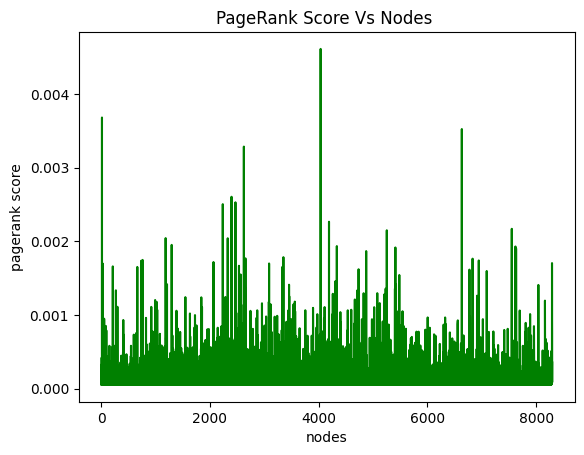

In [72]:
x_label=[]
y_label=[]
itemList=sorted(pageRank.items())
for i in range(len(itemList)):
  x_label.append(itemList[i][0])
  y_label.append(itemList[i][1])
plt.plot(x_label,y_label, color='g')
plt.xlabel('nodes')
plt.ylabel('pagerank score')
plt.title('PageRank Score Vs Nodes ')
plt.show()

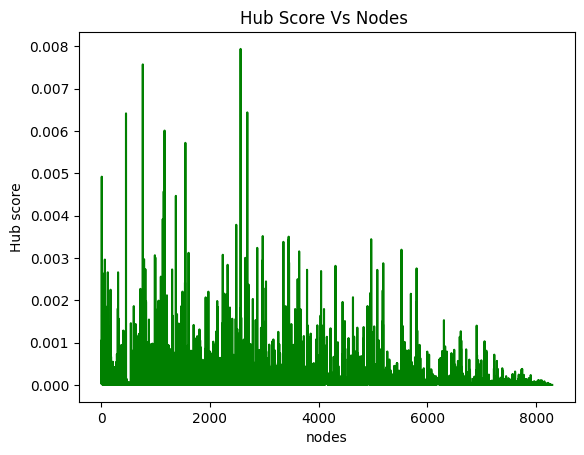

In [78]:
x_label=[]
y_label=[]
itemList=sorted(hubScore.items())
for i in range(len(itemList)):
  x_label.append(itemList[i][0])
  y_label.append(itemList[i][1])
plt.plot(x_label,y_label, color='g')
plt.xlabel('nodes')
plt.ylabel('Hub score')
plt.title('Hub Score Vs Nodes ')
plt.show()

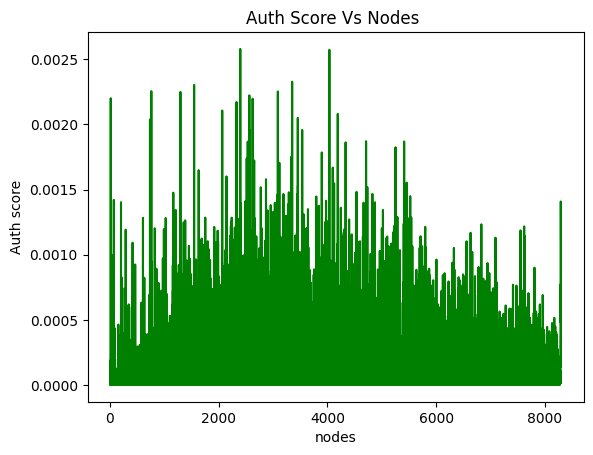

In [79]:
x_label=[]
y_label=[]
itemList=sorted(authScore.items())
for i in range(len(itemList)):
  x_label.append(itemList[i][0])
  y_label.append(itemList[i][1])
plt.plot(x_label,y_label, color='g')
plt.xlabel('nodes')
plt.ylabel('Auth score')
plt.title('Auth Score Vs Nodes ')
plt.show()